/Users/jaekunpark/opt/anaconda3/envs/test/lib/python3.6/site-packages/tensorflow_core/python/keras/datasets/reuters.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/jaekunpark/opt/anaconda3/envs/test/lib/python3.6/site-packages/tensorflow_core/python/keras/datasets/reuters.py:114: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs
Train on 7982 samples, validate on 2246 samples
Epoch 1/10
7982/7982 [==============================] - 2s 225us/sample - loss: 3.0932 - accuracy: 0.4899 - val_loss: 2.1453 - val_accuracy: 0.5779
Epoch 2/10
7982/7982 [==============================] - 1s 146us/sample - loss: 1.6662 - accuracy: 0.6560 - val_loss: 1.4542 - val_accuracy: 0.6937
Epoch 3/10
7982/7982 [==============================] - 1s 146us/sample - loss: 1.1627 - accuracy: 0.7456 - val_loss: 1.2418 - val_accuracy: 0.7275
Epoch 4/10
7982/7982 [==============================] - 1s 145us/sample - loss: 0.8747 - accuracy: 0.8061 - val_loss: 1.1134 - val_accuracy: 0.7618
Epoch 5/10
7982/7982 [==============================] - 1s 145us/sample - loss: 0.6530 - accuracy: 0.8601 - val_loss: 1.0432 - val_accuracy: 0.7703
Epoch 6/10
7982/7982 [==============================] - 1s 146us/sample - loss: 0.4727 - accuracy: 0.9017 - val_loss: 1.0085 - val_accuracy: 0.7

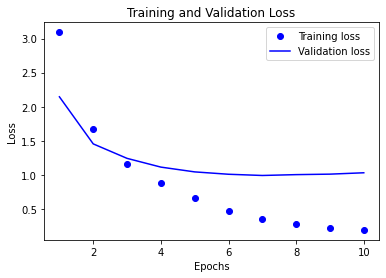

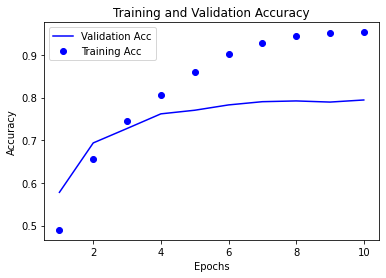

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
# from keras.utils.np_utils import to_categorical 가 아래와 같이 변경되었으므로 유의 할 것
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


reuter_data = tf.keras.datasets.reuters
(train_data, train_labels), (test_data, test_labels) = reuter_data.load_data(num_words = 30000)

# len(train_data) = 8982 , len(test_data) = 2246

# 로이터 데이터셋을 텍스트로 디코딩
'''
word_index = reuter_data.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[1]])
print(decoded_newswire)
'''

# 데이터 인코딩(Convert to Integer Tensor)
def vectorize_sequences(sequences, dimension = 30000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

'''
# 레이블 인코딩(One-Hot Encoding)
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels =  to_one_hot(test_labels)
'''
# from tensorflow.keras.utils import to_categorical 케라스 내장 함수 이용 레이블 인코딩
# 레이블 정수 텐서로 변환시 loss 에서 sparse_categorical_crossentropy 사용
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


# 모델 정의
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (30000,)))
model.add(Dropout(0.3))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(46, activation = 'softmax'))

# 모델 컴파일
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# 검증 세트 준비
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# 모델 훈련
%time
history = model.fit(partial_x_train, partial_y_train, 
                    epochs = 10, batch_size = 512, validation_data = (x_test, one_hot_test_labels))
results = model.evaluate(x_test, one_hot_test_labels)
print(results)
print(model.metrics_names)

# 훈련과 검증 손실 그리기
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 훈련과 검증 정확도 그리기

plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
